In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data = pd.read_csv('50_Startups.csv')

In [80]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [82]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


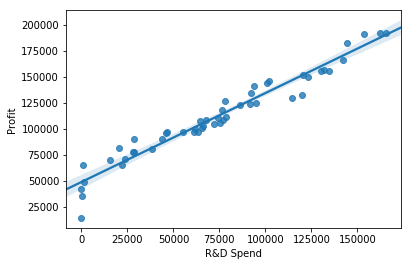

In [83]:
sns.regplot(data['R&D Spend'],data['Profit'])

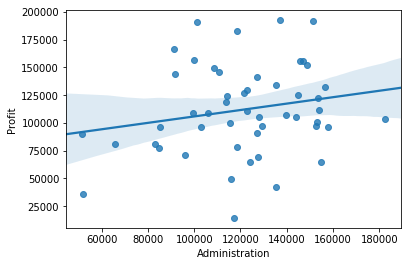

In [84]:
sns.regplot(data['Administration'],data['Profit'])

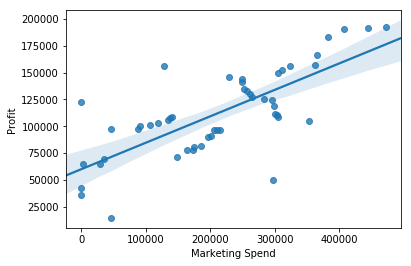

In [85]:
sns.regplot(data['Marketing Spend'],data['Profit'])

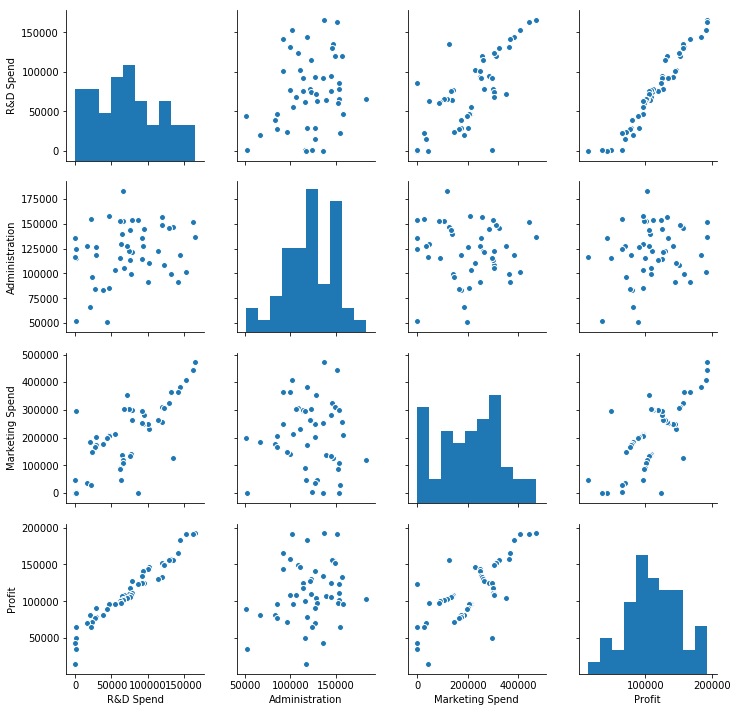

In [86]:
sns.pairplot(data)

In [88]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


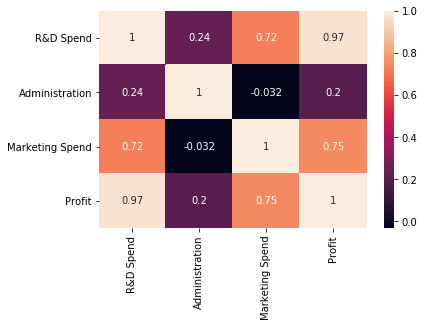

In [89]:
sns.heatmap(data.corr(),annot=True)

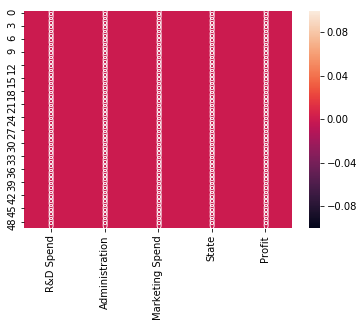

In [90]:
sns.heatmap(data.isnull(),cmap=None,fmt='.2g',cbar=True,robust=None,annot=True)

C:\Users\Divyansh Mishra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


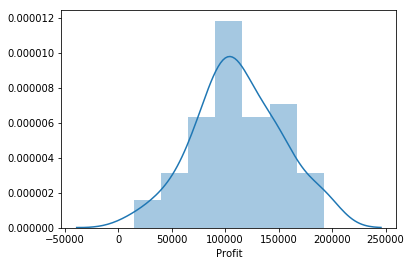

In [91]:
sns.distplot(data.Profit)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Divyansh Mishra\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\Divyansh Mishra\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\Divyansh Mishra\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\Divyansh Mishra\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\Divyansh Mishra\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:

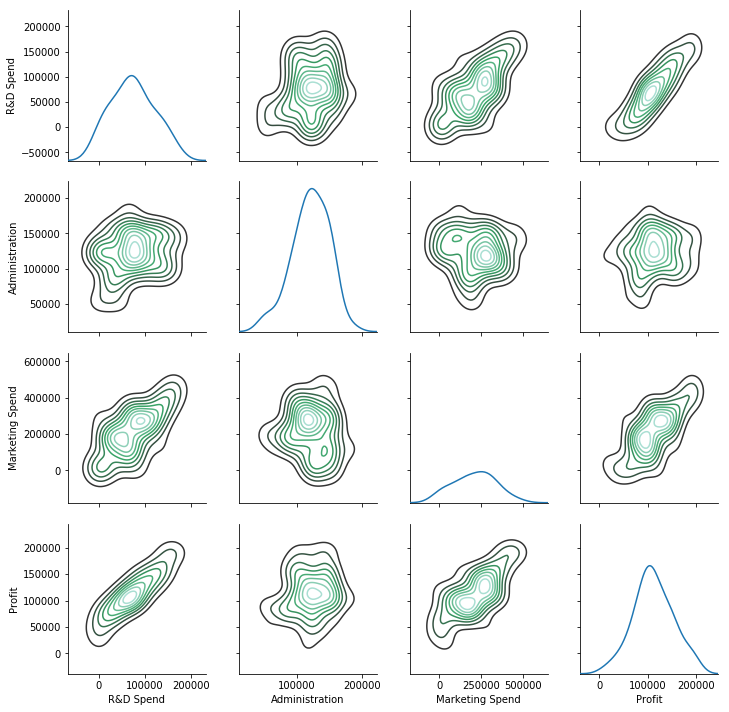

In [92]:
g = sns.PairGrid(data)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)

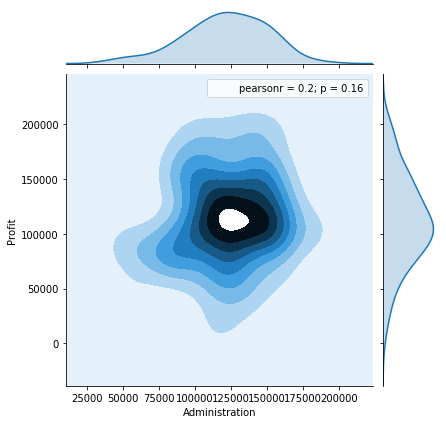

In [93]:
sns.jointplot(x="Administration", y="Profit", data=data, kind="kde");

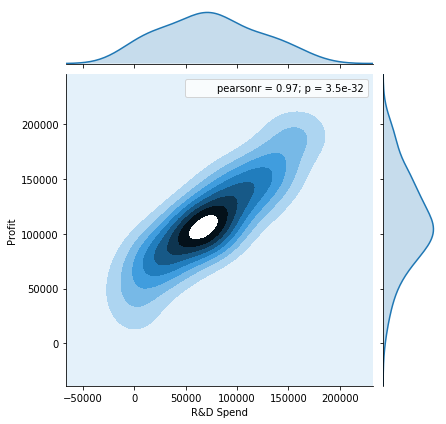

In [52]:
sns.jointplot(x="R&D Spend", y="Profit", data=data, kind="kde");

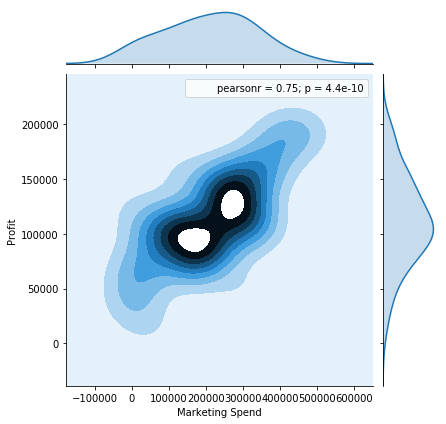

In [94]:
sns.jointplot(x="Marketing Spend", y="Profit", data=data, kind="kde");

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
for column in data.columns:
        if data[column].dtype == np.number:
            continue
        data[column] = LabelEncoder().fit_transform(data[column])

In [98]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [99]:
x=data.drop('Profit',axis=1)

In [100]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [101]:
y=data['Profit']

In [108]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [112]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State
44,22177.74,154806.14,28334.72,0
33,55493.95,103057.49,214634.81,1
11,100671.96,91790.61,249744.55,0
43,15505.73,127382.30,35534.17,2
1,162597.70,151377.59,443898.53,0


In [113]:
y_train.head()

44     65200.33
33     96778.92
11    144259.40
43     69758.98
1     191792.06
Name: Profit, dtype: float64

In [117]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression

In [118]:
lgr = LinearRegression()
lgr.fit(x_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
prediction = lgr.predict(x_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error




In [126]:
print('intercept : ',lgr.intercept_)
print('coefficients : ',lgr.coef_)
print('acc : ',lgr.score(x_test,y_test))
print('MAE : ',mean_absolute_error(y_test,prediction))
print('MSE : ',mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,prediction)))


intercept :  54336.10983610855
coefficients :  [ 8.35238911e-01 -2.10544735e-02  1.12045575e-02 -2.92627980e+03]
acc :  0.9165939458943353
MAE :  9698.321274738239
MSE :  175352452.7137186
RMSE :  13242.07131508204


In [127]:
#Using Ridge

from sklearn.linear_model import Ridge



ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_test)

In [129]:
print('intercept : ',ridgeReg.intercept_)
print('coefficients : ',ridgeReg.coef_)
print('acc : ',ridgeReg.score(x_test,y_test))
print('MAE : ',mean_absolute_error(y_test,pred))
print('MSE : ',mean_squared_error(y_test,pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred)))

intercept :  53144.178058083715
coefficients :  [ 7.60004215e-01  4.98726828e-05  2.88343226e-02 -2.34195830e+03]
acc :  0.9202340976411496
MAE :  9168.78290841562
MSE :  167699416.68535835
RMSE :  12949.880952555446


In [144]:
#Using Lasso
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train,y_train)

predicted = lassoReg.predict(x_test)

In [145]:
print('intercept : ',lassoReg.intercept_)
print('coefficients : ',lassoReg.coef_)
print('acc : ',lassoReg.score(x_test,y_test))
print('MAE : ',mean_absolute_error(y_test,predicted))
print('MSE : ',mean_squared_error(y_test,predicted))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,predicted)))

intercept :  54335.21288535393
coefficients :  [ 8.35283534e-01 -2.10445274e-02  1.11787017e-02 -2.92427775e+03]
acc :  0.9165957327084626
MAE :  9698.179764084232
MSE :  175348696.1250259
RMSE :  13241.929471380894


In [146]:
# Using Elastic Net
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_test)

In [147]:
print('intercept : ',ENreg.intercept_)
print('coefficients : ',ENreg.coef_)
print('acc : ',ENreg.score(x_test,y_test))
print('MAE : ',mean_absolute_error(y_test,pred_cv))
print('MSE : ',mean_squared_error(y_test,pred_cv))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred_cv)))

intercept :  54074.79899359761
coefficients :  [ 8.29691315e-01 -2.67218752e-02  1.16283597e-02 -1.55420077e+03]
acc :  0.9233017983306071
MAE :  9336.3749371351
MSE :  161249898.7713897
RMSE :  12698.421113327031
